In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\tshankar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [31]:
import numpy as np
import glob, os, copy
%matplotlib widget
import matplotlib.pyplot as plt
import sklearn.manifold as skl_manifold


In [12]:
cd  C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E0_C0

C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E0_C0


In [16]:
human_zs = np.load("LatentSet.npy")
human_task_list = np.load("TaskIDSet.npy")

In [17]:
cd  C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E96000_C192000/

C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E96000_C192000


In [18]:
robot_zs = np.load("LatentSet.npy")
robot_task_list = np.load("TaskIDSet.npy")

In [25]:
comp_task_list = ['Pouring+Stirring', 'DrawerOpening+PickPlace', 'BoxOpening+Pouring']
indiv_task_list = ['Pouring', 'BoxOpening', 'DrawerOpening', 'PickPlace', 'Stirring']

In [34]:
def get_embedding(latent_zs, tsne=None):

	perplexity = 30
	if tsne is None:
		tsne = skl_manifold.TSNE(n_components=2,random_state=0,perplexity=perplexity)		
	embedded_zs = tsne.fit_transform(latent_zs)
	return embedded_zs, tsne

In [37]:
robot_embedded_zs, robot_tsne = get_embedding(robot_zs)
human_embedded_zs, _ = get_embedding(human_zs, tsne=robot_tsne)

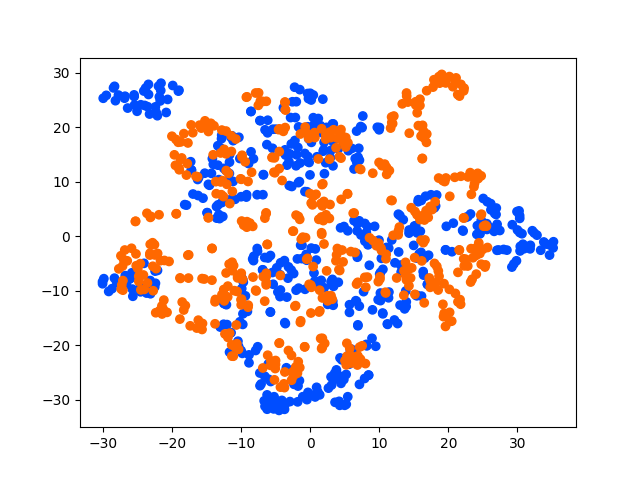

In [43]:
plt.close()
plt.scatter(robot_embedded_zs[:,0], robot_embedded_zs[:,1], c=0.2*np.ones(robot_embedded_zs.shape[0]), cmap='jet', vmin=0, vmax=1)
plt.scatter(human_embedded_zs[:,0], human_embedded_zs[:,1], c=0.8*np.ones(human_embedded_zs.shape[0]), cmap='jet', vmin=0, vmax=1)
plt.show()

In [46]:
concatenated_zs = np.concatenate([robot_embedded_zs, human_embedded_zs], axis=0)
concat_embedded_zs, _ = get_embedding(concatenated_zs)
# human_embedded_zs, _ = get_embedding(human_zs, tsne=robot_tsne)

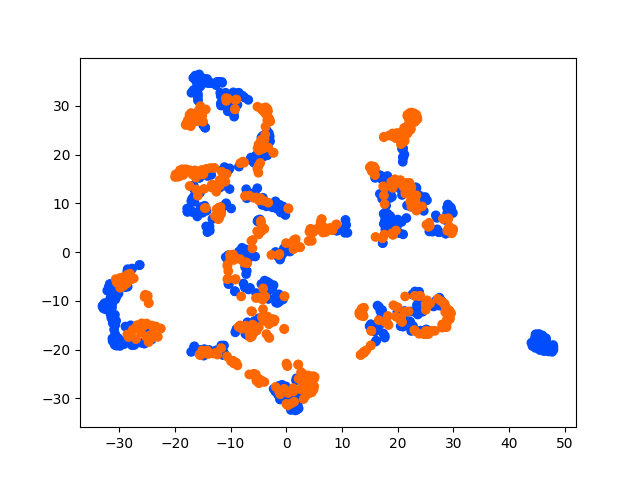

In [47]:
colors = 0.2*np.ones(robot_embedded_zs.shape[0] + human_embedded_zs.shape[0])
colors[robot_embedded_zs.shape[0]:] = 0.8

plt.close()
plt.scatter(concat_embedded_zs[:,0], concat_embedded_zs[:,1], c=colors, cmap='jet', vmin=0, vmax=1)
plt.show()

In [45]:
def get_plot(human_embedded_zs, robot_embedded_zs, human_task_list, robot_task_list):

    embedded_zs = human_embedded_zs
    task_id_set = human_task_list
    # For each compositional task, use a different marker. 
    # For each constituent individual task, one of the original 5 colors for each task for the skill. 
    
    # Create 3 lists for each compositional task, which stores indices of embedded_zs that are of that task.
    per_compositional_task_indices = {}
    individual_task_indices = []

    for k, v in enumerate(comp_task_list):
        per_compositional_task_indices[v] = []
            
    fig = plt.figure()
    ax = fig.gca()				

    for k in range(len(embedded_zs)):
        
        # For all embedded z's, add index of this z to the appropriate composiitonal task index list.
        # per_compositional_task_indices[self.dataset.task_list[self.task_id_set[k]]].append(k)
        per_compositional_task_indices[comp_task_list[task_id_set[k]]].append(k)

        # For all embedded z's, get which individual task this segment came from. 		
        # The logic here is that if starting segment index < split index - 7, use the first index. Otherwise use the second index. 
        # index = 1-int(self.segment_indices_set[k] <= (self.task_split_indices_set[k]-7))
        index = int(self.segment_indices_set[k] > (self.task_split_indices_set[k]-7))

        # First get what compositional task this is. Then get the name of which individual task it is. 								
        individual_task_indices.append( self.dataset.individual_task_list.index( self.dataset.compositional_task_sets[ self.dataset.task_list[self.task_id_set[k]] ][index] ) )						

    # Now for each compositional task, plot things with a particular marker. 
    marker_list = ['o', 'D', 's']
    max_task = 4 

    for k, v in enumerate(self.dataset.task_list):			

        individual_task_indices_array = np.array(individual_task_indices)[np.array(per_compositional_task_indices[v])]
        colors = 0.1 + (0.75*(individual_task_indices_array/max_task))

        xs = embedded_zs[np.array(per_compositional_task_indices[v]),0]
        ys = embedded_zs[np.array(per_compositional_task_indices[v]),1]

        # ##############################
        # # PLOT OPTION 1 - markers 
        # ##############################		
        ax.scatter(xs, ys, c=colors, marker=marker_list[k], vmin=0, vmax=1, s=100, cmap='jet', edgecolors='black')			
        
        # ##############################
        # # # PLOT OPTION 2 - no markers, just bigger plots and colors
        # ##############################

        # # First plot with compositional task colors with bigger sizes. 
        # new_colors = 0.1 + 0.75*(k/2)*np.ones_like(colors)
        # ax.scatter(xs, ys, c=new_colors, vmin=0, vmax=1, marker=marker_list[k], s=200, cmap='jet', edgecolors='black')

        # # Then plot with task colors.
        # ax.scatter(xs, ys, c=colors, vmin=0, vmax=1, cmap='jet', edgecolors='black')

    # Title. 
    ax.set_title("{0}".format(title),fontdict={'fontsize':15})
    fig.canvas.draw()
    # Grab image.
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(int(height), int(width), 3)
    image = np.transpose(image, axes=[2,0,1])

    return image

In [48]:
cd /scratch/cchawla/TrainingLogs/ZSet/E96000_C192000/
robot_zs = np.load("LatentSet.npy")
robot_task_list = np.load("TaskIDSet.npy")

concatenated_z_set = np.concatenate([self.latent_z_set, robot_zs], axis=0)
concat_embedded_zs = self.get_robot_embedding(latent_z=concatenated_z_set)

human_embedded_zs = concat_embedded_zs[:self.latent_z_set.shape[0]]
robot_embedded_zs = concat_embedded_zs[self.latent_z_set.shape[0]:]

fig, ax = self.plot_embedding(concat_embedded_zs[:self.latent_z_set.shape[0]], title="Shared Human to Robot Embedding Space", return_axis=True)

max_task = max(robot_task_list)
colors = 0.1 + (0.75*(robot_task_list/max_task))

# ax.scatter(robot_embedded_zs[:,0], robot_embedded_zs[:,1], c=colors, marker=marker_list[k], vmin=0, vmax=1, s=100, cmap='jet', edgecolors='black')
ax.scatter(robot_embedded_zs[:,0],robot_embedded_zs[:,1],c=colors,vmin=0,vmax=1,cmap='jet',edgecolors='black')

fig.canvas.draw()

cd /scratch/cchawla/TrainingLogs/ZSet/Images/
plt.savefig("foo2.png")


SyntaxError: invalid syntax (<ipython-input-48-f79867150e1d>, line 1)

<ipython-input-73-45e0b5408f06>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(concat_embedded_zs[:1,0], concat_embedded_zs[:1,1], marker='s', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)
<ipython-input-73-45e0b5408f06>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(concat_embedded_zs[3:5,0], concat_embedded_zs[3:5,1], marker='X', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)
<ipython-input-73-45e0b5408f06>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(concat_embedded_zs[5:8,0], concat_embedded_zs[5:8,1], marker='d', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)


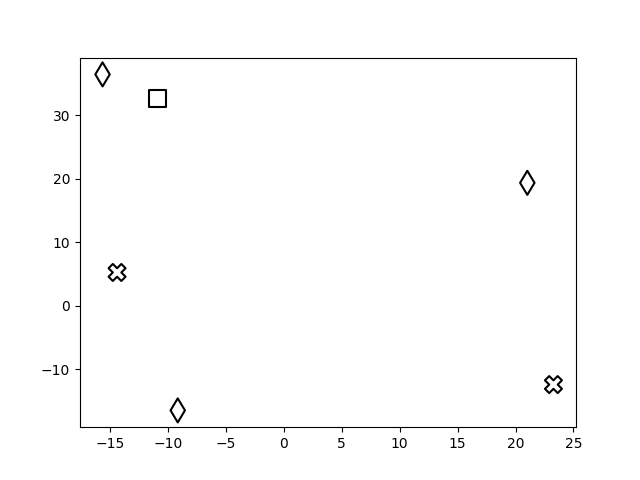

In [73]:
plt.close()
plt.scatter(concat_embedded_zs[:1,0], concat_embedded_zs[:1,1], marker='s', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)
plt.scatter(concat_embedded_zs[3:5,0], concat_embedded_zs[3:5,1], marker='X', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)
plt.scatter(concat_embedded_zs[5:8,0], concat_embedded_zs[5:8,1], marker='d', cmap='jet', vmin=0, vmax=1, edgecolors='black', s=150, facecolors='none', linewidth=1.5)
plt.show()
plt.savefig("F2.png")

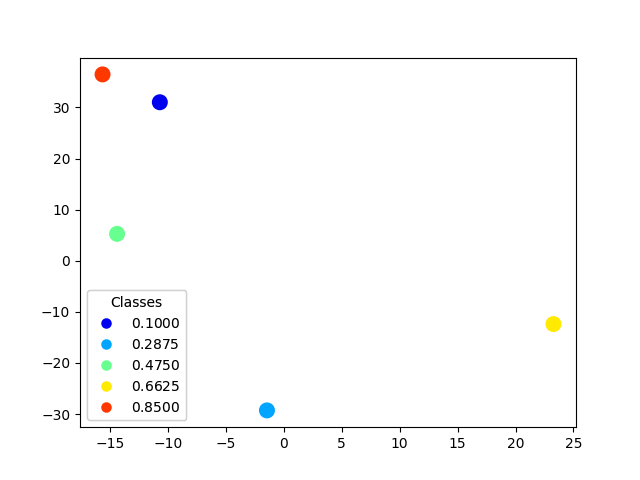

In [75]:
m = 4
basec = np.arange(0,5)
colors = colors = 0.1 + (0.75*basec/m)

x = 1
fig = plt.figure()
ax = fig.gca()
# plt.scatter(concat_embedded_zs[x:x+5,0], concat_embedded_zs[x:x+5,1], c=colors, cmap='jet', vmin=0, vmax=1, edgecolors='black', s=100, linewidth=1.5)
# scatter = ax.scatter(concat_embedded_zs[x:x+5,0], concat_embedded_zs[x:x+5,1], c=colors, cmap='jet', vmin=0, vmax=1, s=100, linewidth=1.5)
scatter = ax.scatter(concat_embedded_zs[x:x+5,0], concat_embedded_zs[x:x+5,1], c=basec, cmap='jet', vmin=0, vmax=1, s=100, linewidth=1.5)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()
plt.savefig("F3.png")

In [63]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [70]:
pwd

'C:\\Users\\tshankar\\Desktop\\Research\\Data\\Results\\IROS24_Submission\\JointH2RDir\\ZSet\\E96000_C192000'

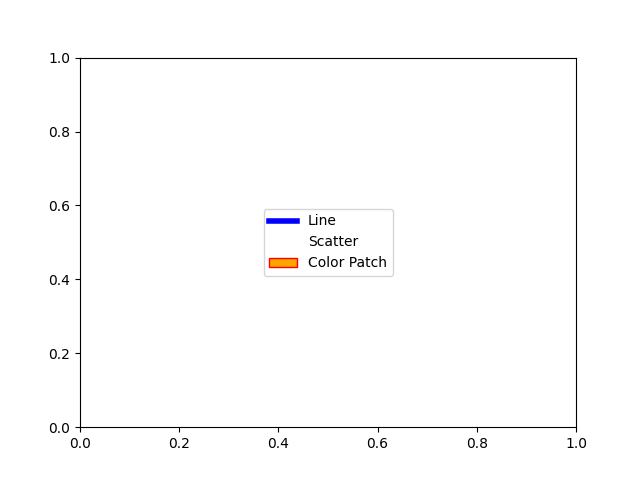

In [80]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='w', markersize=15),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()